
# **Convolutional Neural Networks Visualization**
First we import the needed libraries. 

In [0]:
import math
import numpy as np 
import matplotlib as mp
import matplotlib.pyplot as plt
import tensorflow as tf

#   TF-Slim is a lightweight library for defining, training and evaluating complex models in TensorFlow.

import tensorflow.contrib.slim as slim

#    https://github.com/tensorflow/tensorflow/tree/r0.7/tensorflow/examples/tutorials/mnist 
  
from tensorflow.examples.tutorials.mnist import input_data

Next we import the MNIST data files we are going to be classifying. This database contains images of thousands of handwritten digits, and their proper labels. For ease, we're using a script from Github - Tensorflow.

https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py

After running this line it will download the MNIST database for you and also extract it.


In [12]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Next we are going to define our Convolutional Neural Networks. The network has three sets of convolution -> pooling layers, followed by a fully connected softmax layer. I have choosen 4,8, and 16 number of convolutional filters at each layer. You can very it. 

Note: It is these filters what we are going to be visualizing, so we can see in realtime what features are learned from the dataset with more or less filters.

In [0]:
tf.reset_default_graph()      # Clears the default graph stack and resets the global default graph.

x = tf.placeholder(tf.float32, [None, 784],name="x-in") # Inserts a placeholder for a tensor that which we will provide.
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in") # Inserts a placeholder for a tensor that is true prediction. 
keep_prob = tf.placeholder("float") # Droup out Value to be set.


x_image = tf.reshape(x,[-1,28,28,1]) # Reshapes a tensor value to 28x28 for input image x.  A shape of [-1] flattens into 1-D (one dimension).
hidden_1 = slim.conv2d(x_image,4,[11,11]) # Input X-image, number of kernels are 4 and size of kernel is 3 x 3.
pool_1 = slim.max_pool2d(hidden_1,[2,2])  # Pooling Layer 1. [[2,2] is stride length.] 
hidden_2 = slim.conv2d(pool_1,8,[7,7]) # Input Pooling Layer 1, number of kernels are 8 and size of kernel is 3 x 3.
pool_2 = slim.max_pool2d(hidden_2,[2,2]) # Pooling Layer 2. [[2,2] is stride length.]
hidden_3 = slim.conv2d(pool_2,16,[5,5]) # Input Pooling Layer 2, number of kernels are 16 and size of kernel is 3 x 3.
hidden_4 = slim.conv2d(hidden_3,32, [3,3]) #Input hidden_3 layer, kernels are 32 with size of [3,3]
hidden_4 = slim.dropout(hidden_4,keep_prob) # Introducing dropout for third layer 0.5.
out_y = slim.fully_connected(slim.flatten(hidden_4),10,activation_fn=tf.nn.softmax)


# Defining the loss function, which is cross_entropy loss function. 
#https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html



cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1)) # Returns the truth value of (x == y) element-wise.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) # Computes the mean of elements across dimensions of a tensor.
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) # training steps with ADAM optimizer considering cross-entropy loss function. The learning rate i set to 1e-4.





We then train the convolutional neural network using batch gradient descent with Adam optimization. Adjust the batch size and number of iterations to see how it effects the model accuracy.

In [14]:
batchSize = 50 # Number of batch images which are going to forward pass. 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))
        
        
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))



step 100, training accuracy 0.48
step 200, training accuracy 0.72
step 300, training accuracy 0.78
step 400, training accuracy 0.76
step 500, training accuracy 0.82
step 600, training accuracy 0.94
step 700, training accuracy 0.88
step 800, training accuracy 0.9
step 900, training accuracy 0.88
step 1000, training accuracy 0.86
test accuracy 0.9048


Now we define a couple of functions that will allow us to visualize the network. The first gets the activations at a given layer for a given input image. The second plots those activations in a grid and so for all layers.

In [0]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0}) # When session runs, for units it will reshape it to [1, 784] and place dropout to be 1.0. 
    plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(28,28))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1 # The method ceil() in Python returns ceiling value of x i.e., the smallest integer not less than x. 200.91 then 201.
    for i in range(filters): #For number of filters plot this diagrams.
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray") #It will result an image in which pixels are displayed as a square of multiple pixels.



Now we can choose an image to pass through the network to visualize the network activation, and look at the raw pixels of that image.

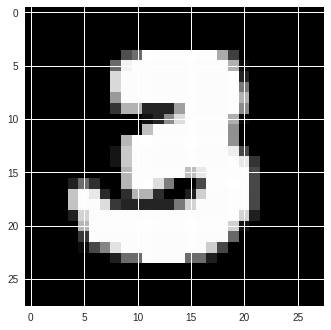

In [18]:
imageToUse = mnist.test.images[200]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")


Now we can look at how that image activates the neurons of the first convolutional layer. Notice how each filter has learned to activate optimally for different features of the image.

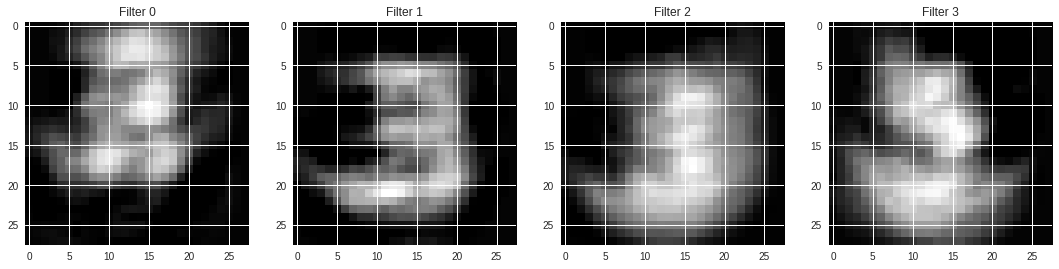

In [19]:
getActivations(hidden_1,imageToUse)

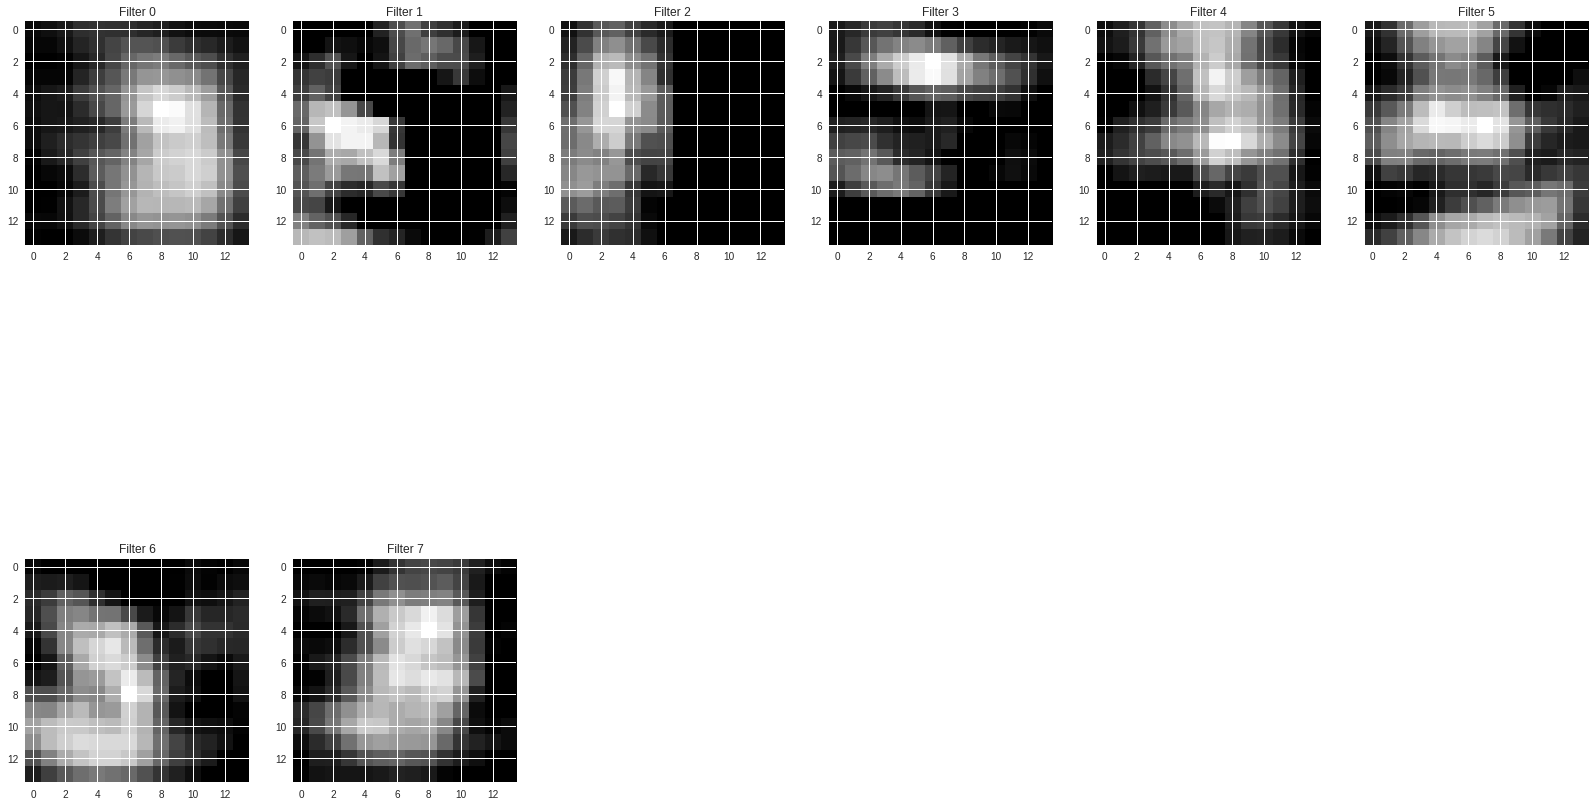

In [20]:
getActivations(hidden_2,imageToUse)

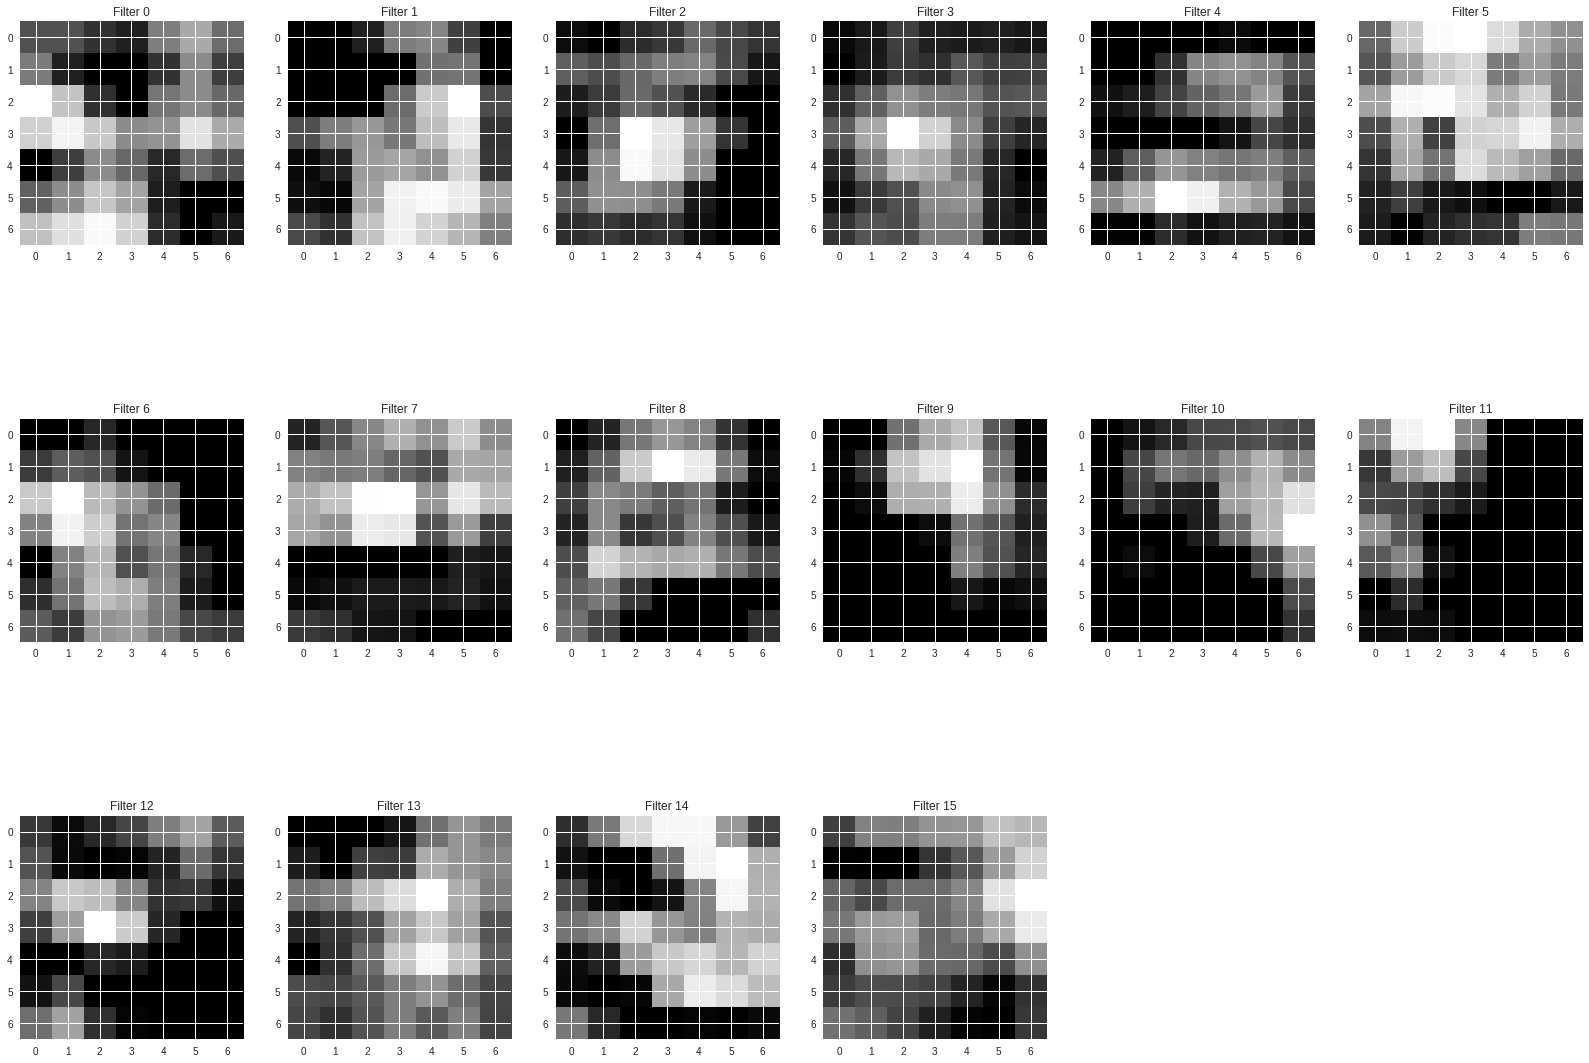

In [21]:
getActivations(hidden_3,imageToUse)

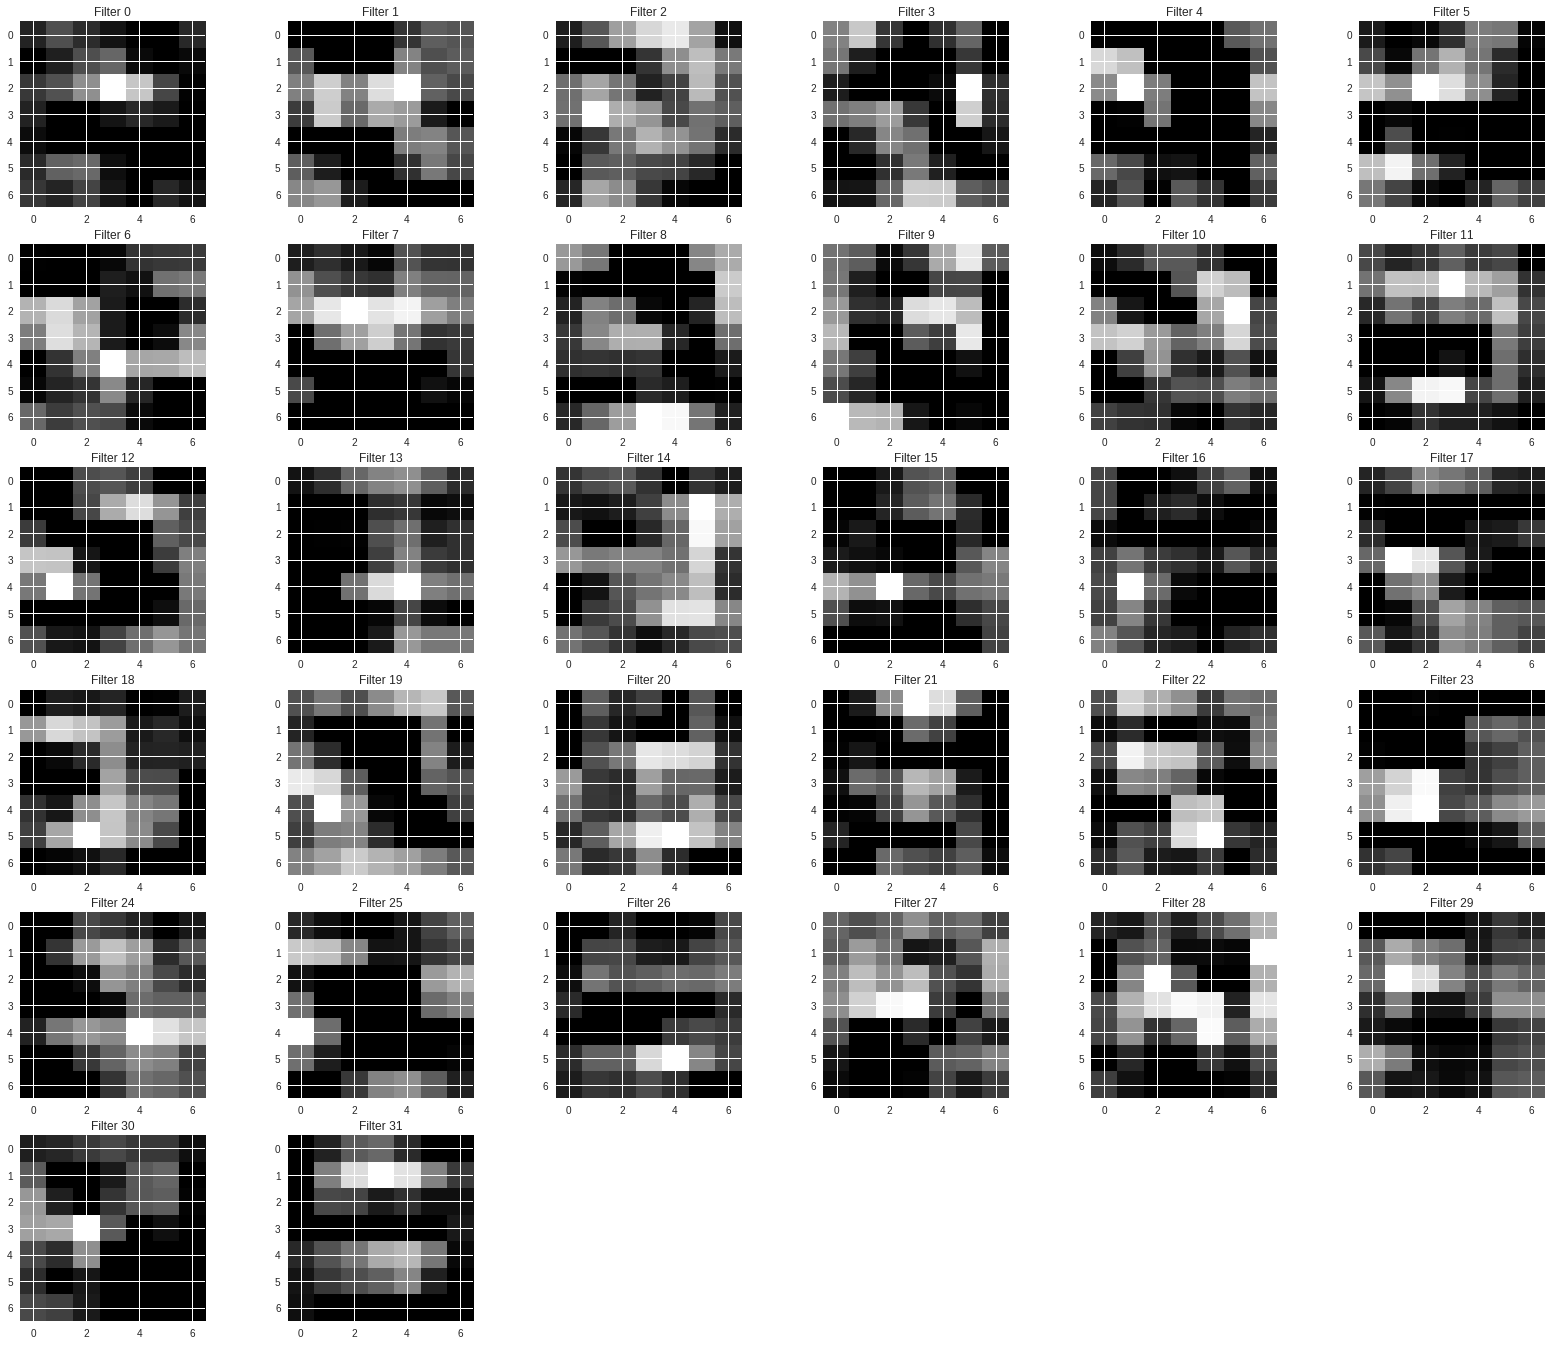

In [22]:
getActivations(hidden_4,imageToUse)


The model we used here is of a relatively simple network, but the visualization technique can be extended to give insights into any convolutional network.